# Term Deposit Subscription Prediction - Warren Camp

# Problem Statement

Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.


# Deliverables

Deliverables - 1 (Exploratory data quality report reflecting the following):
1.Univariate analysis
2.Multivariate analysis

Deliverables - 2(Prepare the data for analytics):
1.Ensure the attribute types are correct. If not, take appropriate actions.
2.Get the data model ready. 
3.Transform the data i.e. scale / normalize if required
4.Create the training set and test set in ratio of 70:30

Deliverable –3 (create the ensemble model)
1.First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model.
2.Build the ensemble models(Bagging and Boosting)and note the model performanceby using different matrices. Use same metrics as in above model. (at least 3 algorithms)
3.Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. 

# Attribute Information

Bank client data:
1.age:Continuous feature 
2.job:Type of job (management, technician, entrepreneur, blue-collar, etc.)
3.marital: marital status(married, single, divorced)
4.education:education level (primary, secondary, tertiary)
5.default: has credit in default? 
6.housing: has housing loan? 
7.loan: has personal loan?
8.balance in account Related to previous contact:

Related to previous contract:
9.contact: contact communication type
10.month: last contact month of year
11.day: last contact day of the month
12.duration: last contact duration, in seconds*

Other attributes:
13.campaign: number of contacts performed during this campaign and for this client
14.pdays: number of days that passed by after the client was last contacted from a previous campaign(-1 tells us the person has not been contacted or contact period is beyond 900 days)
15.previous: number of contacts performed before this campaign and for this client
16.poutcome: outcome of the previous marketing campaign

Output variable (desired target):
17.Target: Tell us has the client subscribed a term deposit. (Yes, No)

In [1]:
#Import all necessary modules 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, mean_squared_error, mean_absolute_error
from yellowbrick.classifier import ClassificationReport, ROCAUC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from catboost import CatBoostRegressor
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

%matplotlib inline

In [2]:
# Load the data

df = pd.read_csv('bank-full.csv', sep=',')

In [3]:
# Print first 10 observations from the dataset

df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
# Print the shape of the dataset and the datatypes of each column 

print('Dataset Shape: ', df.shape)
print('Dataset data types: ', df.dtypes)

Dataset Shape:  (45211, 17)
Dataset data types:  age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object


# The dataset provides the bank customers’ information. It includes 45,211 records and 17 fields.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Print the descriptive statistics of each & every column using describe() function

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


In [7]:
# Check for missing values in the dataset

df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

# No missing data, all 0s returned

In [8]:
print('Number of unique values in each column: \n')
columns = df.columns
for i in columns:
    num = df[i].nunique()
    print(i, num)

Number of unique values in each column: 

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
Target 2


In [9]:
# Value counts of all categorical columns.
print('1 job:\n', df['job'].value_counts())
print('2 marital:\n', df['marital'].value_counts())
print('3 education:\n', df['education'].value_counts())
print('4 default:\n', df['default'].value_counts())
print('5 housing:\n', df['housing'].value_counts())
print('6 loan:\n', df['loan'].value_counts())
print('8 poutcome:\n', df['poutcome'].value_counts())
print('11 Target:\n', df['Target'].value_counts())

1 job:
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
2 marital:
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
3 education:
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
4 default:
 no     44396
yes      815
Name: default, dtype: int64
5 housing:
 yes    25130
no     20081
Name: housing, dtype: int64
6 loan:
 no     37967
yes     7244
Name: loan, dtype: int64
8 poutcome:
 unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
11 Target:
 no     39922
yes     5289
Name: Target, dtype: int64


# the following features can be considered "category" : job, marital, education, poutcome

# Univariate analysis
Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc.


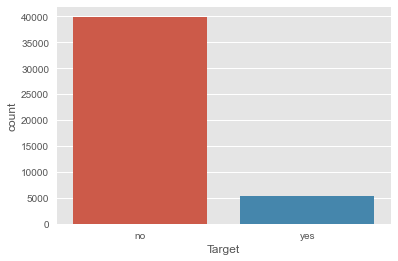

In [10]:
sns.countplot(df['Target'])
plt.show()

In [11]:
no_subscript = len(df[df['Target']=='no'])
subscript = len(df[df['Target']=='yes'])
pct_of_no_subscript = no_subscript/(no_subscript + subscript)
print("percentage of no subscription is", pct_of_no_subscript*100)
pct_of_subscript = subscript/(no_subscript + subscript)
print("percentage of subscription", pct_of_subscript*100)

percentage of no subscription is 88.30151954170445
percentage of subscription 11.698480458295547


# Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11.

In [12]:
df.groupby('Target').mean()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,40.84,"1,303.71",15.89,221.18,2.85,36.42,0.50
yes,41.67,"1,804.27",15.16,537.29,2.14,68.70,1.17


In [13]:
df.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.29,"1,135.84",15.56,246.90,2.58,47.86,0.67
blue-collar,40.04,"1,078.83",15.44,262.90,2.82,44.03,0.51
entrepreneur,42.19,"1,521.47",15.70,256.31,2.80,32.49,0.48
housemaid,46.42,"1,392.40",16.00,245.82,2.82,21.51,0.37
management,40.45,"1,763.62",16.11,254.00,2.86,38.67,0.67
retired,61.63,"1,984.22",15.44,287.36,2.35,37.44,0.64
self-employed,40.48,"1,647.97",16.03,268.16,2.85,34.75,0.55
services,38.74,997.09,15.64,259.32,2.72,42.00,0.50
student,26.54,"1,388.06",14.90,246.66,2.30,57.04,0.95


In [14]:
df.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.78,"1,178.87",15.80,262.52,2.63,41.00,0.55
married,43.41,"1,425.93",15.85,253.41,2.84,37.95,0.56
single,33.70,"1,301.50",15.71,266.50,2.65,44.65,0.64


In [15]:
df.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,45.87,"1,250.95",15.42,255.93,2.83,36.08,0.49
secondary,39.96,"1,154.88",15.76,258.69,2.70,42.35,0.57
tertiary,39.59,"1,758.42",16.09,258.52,2.83,39.02,0.66
unknown,44.51,"1,526.75",15.81,257.31,2.85,36.86,0.49


# From the above for a subscripter  - the age of the person is a little older and has a greater balance

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002424B3E0D08>,
      dtype=object)

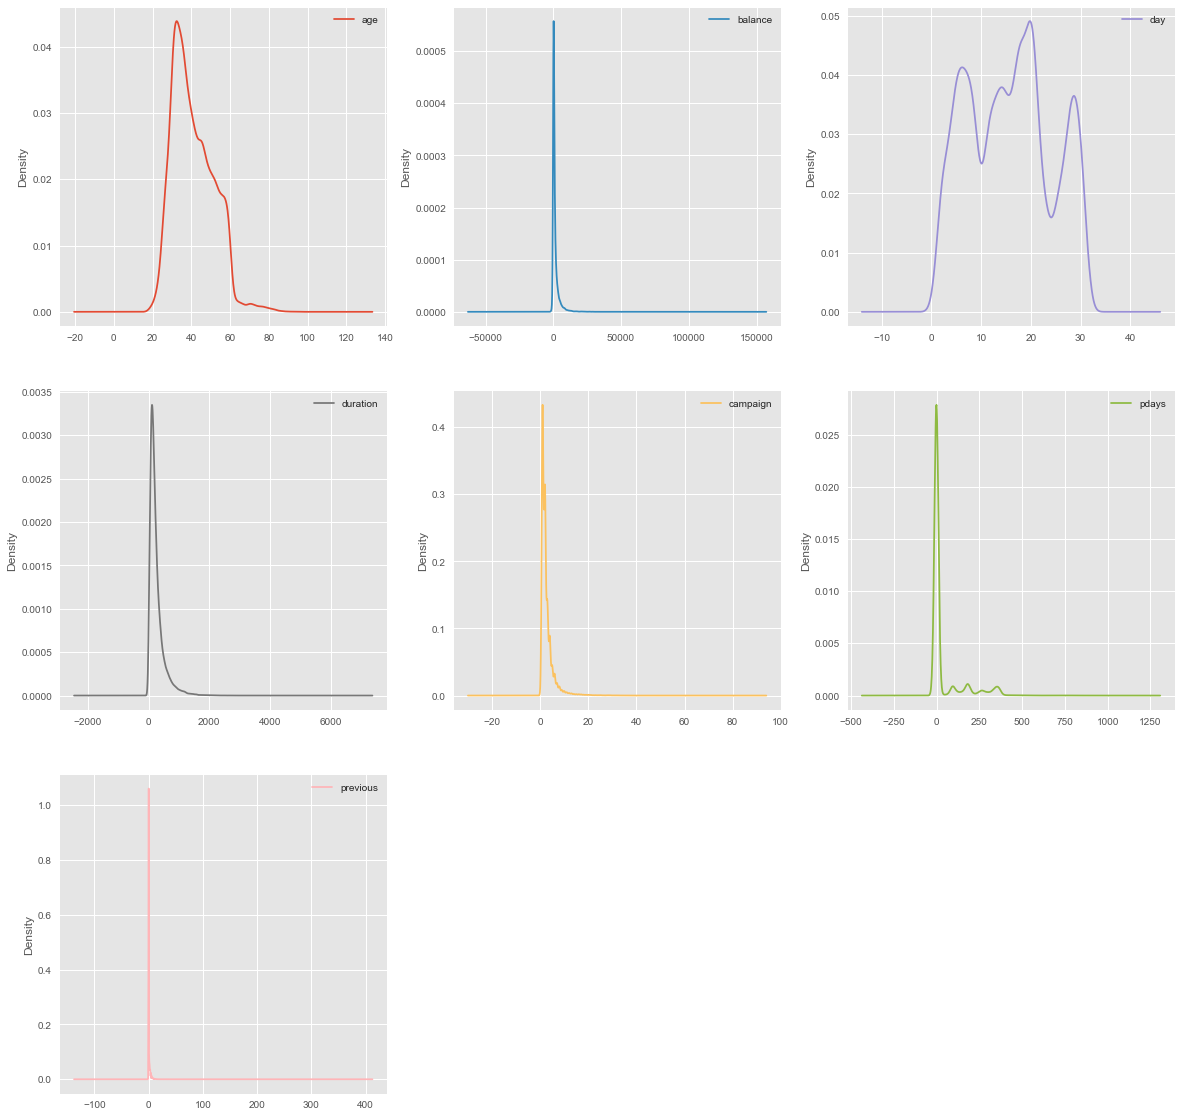

In [16]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(20, 20))

In [17]:
df.corr() # Show correlation matrix 

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


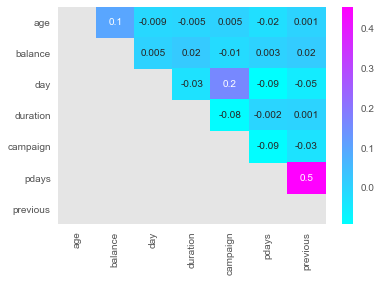

In [18]:
mask = np.tril(df.corr())
sns.heatmap(df.corr(), fmt=".1g", annot=True, cmap="cool", mask=mask)
# I’ve masked the lower left values to avoid duplications and give a clearer view.
# The highest postive correlation is .5 for "pdays" and "previous"

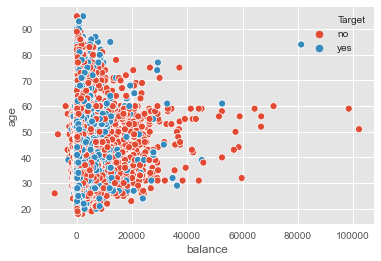

In [19]:
sns.scatterplot(x='balance', y='age', data=df, hue='Target')

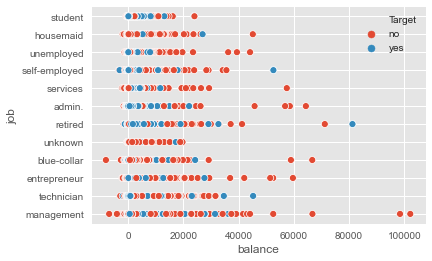

In [20]:
sns.scatterplot(x='balance', y='job', data=df, hue='Target')

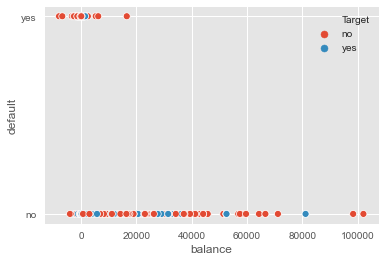

In [21]:
sns.scatterplot(x='balance', y='default', data=df, hue='Target')

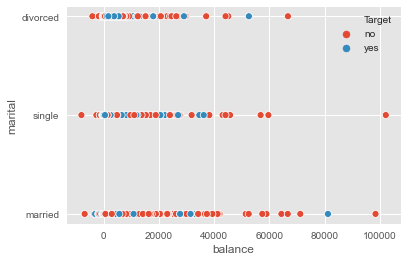

In [22]:
sns.scatterplot(x='balance', y='marital', data=df, hue='Target')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002424BE4F3C8>,
      dtype=object)

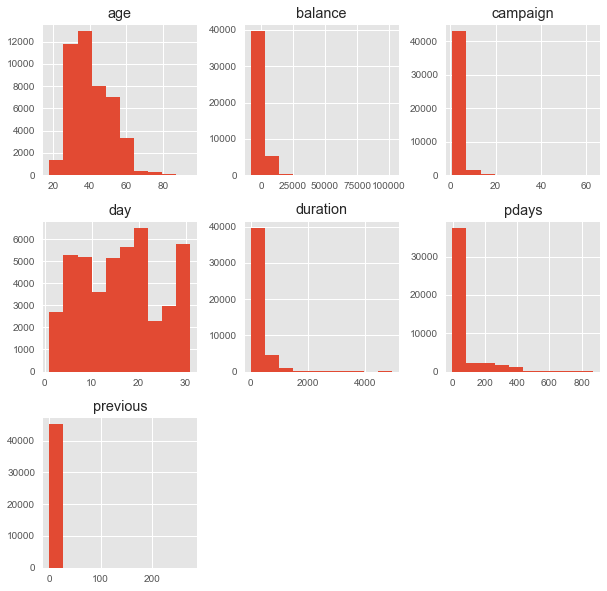

In [23]:
df.hist(figsize=(10,10), grid=True)

# From the histogram, one can see we don't have a good data distribution

C:\ProgramData\Anaconda3\envs\dt\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\dt\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


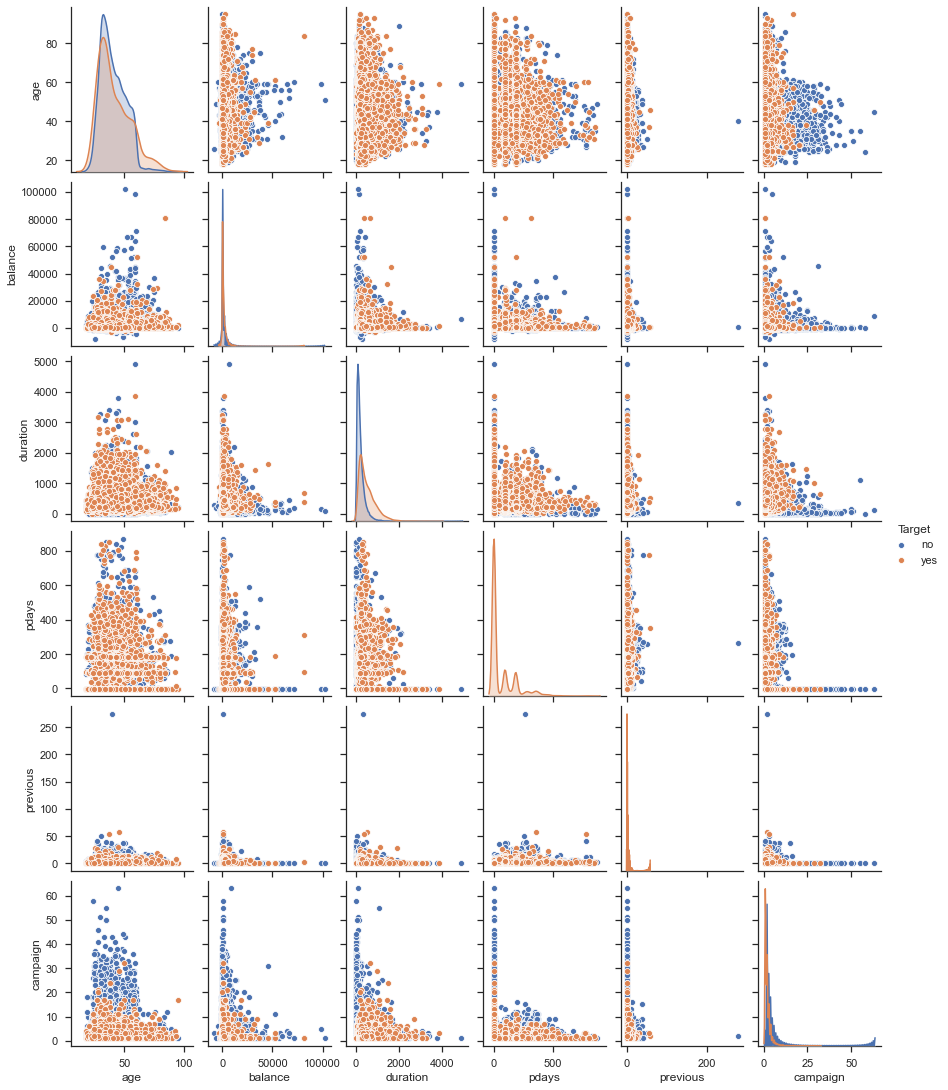

In [38]:
# Bivariate analysis
col = ['age','balance','duration', 'pdays', 'previous', 'campaign']
sns.set(rc={'figure.figsize':(5,5)},style="ticks", color_codes=True)
sns.pairplot(data=df,diag_kind="kde",aspect=0.8, hue='Target', vars=col)

# Deliverables - 2(Prepare the data for analytics):

In [39]:
# Ensure the attribute types are correct. If not, take appropriate actions.
# "category" : material, education, default, housing, loan, contact, poutcome, Target
df['marital'] = df['marital'].astype('category')
df['education'] = df['education'].astype('category')
df['poutcome']= df['poutcome'].astype('category')
df['job']= df['job'].astype('category')

In [40]:
# Drop unnecessay features:
df = df.drop("contact", axis=1)
df = df.drop("month", axis=1)
df = df.drop("day", axis=1)
df = df.drop("duration", axis=1)
df = df.drop("campaign", axis=1)
df = df.drop("previous", axis=1)


In [41]:
# Create a new feature person_contacted: yes or no based on value of pdays equal -1. -1 = False and not equal -1 = True
# pdays: number of days that passed by after the client was last contacted from a previous campaign(-1 tells us the person has not been contacted or contact period is beyond 900 days)
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
pdays_filter = df['pdays'] != -1
df['person_contacted'] = pdays_filter
df = df.drop("pdays", axis=1)

In [42]:
# create X and y train and test datasets
y = df['Target']
X = df.drop(['Target'], axis=1)

In [43]:
# Create Dummier variables for category features
X = pd.get_dummies(data=X)
print(X.head(5))

   age  balance  person_contacted  job_admin.  job_blue-collar  \
0   58     2143             False           0                0   
1   44       29             False           0                0   
2   33        2             False           0                0   
3   47     1506             False           0                1   
4   33        1             False           0                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0                 0              0               1            0   
1                 0              0               0            0   
2                 1              0               0            0   
3                 0              0               0            0   
4                 0              0               0            0   

   job_self-employed  ...  default_no  default_yes  housing_no  housing_yes  \
0                  0  ...           1            0           0            1   
1                  0  ...           1     

In [44]:
X['person_contacted'] = X['person_contacted'].astype('category')


In [45]:
# .Create the training set and test set in ratio of 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=7)

# Logistic Regression algorithm

In [46]:
# Logistic Regression Model Fitting
lr_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state = 7)
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
# Predict the test set results and calculate the accuracy
y_pred = lr_model.predict(X_test)
lr_score = lr_model.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr_score))

Accuracy of logistic regression classifier on test set: 0.89


In [48]:
# Confusion Matrix  using crosstab
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,no,yes
Actual,,
no,11899,131
yes,1306,228


# The result is telling us that we have 12,288 (11728+560) correct predictions and 1,276 (974+302) incorrect predictions.

In [49]:
# Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94     12030
         yes       0.64      0.15      0.24      1534

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.77      0.57      0.59     13564
weighted avg       0.87      0.89      0.86     13564



In [50]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression '], 'accuracy': lr_score})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf





,Method,accuracy
0,Logistic Regression,0.89


# Decision Tree algorithm

In [51]:
# Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.  
# Over fitting was constrained  by limiting the max_depth to 3 and min_samples per leaf to 3.

dt_model = DecisionTreeClassifier(criterion = 'entropy',  max_depth=3, random_state=7, min_samples_leaf=1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

In [52]:
dt_score = dt_model.score(X_test, y_test)
print('Decision Tree Model score: ', dt_score)

Decision Tree Model score:  0.8941315246240047


In [53]:
# Compute precision, recall, F-measure and support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94     12030
         yes       0.64      0.15      0.24      1534

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.77      0.57      0.59     13564
weighted avg       0.87      0.89      0.86     13564



In [54]:
# Confusion Matrix  using crosstab
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,no,yes
Actual,,
no,11899,131
yes,1306,228


In [55]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree  '], 'accuracy': dt_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.89


In [56]:
importances = pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns)
# print(importances.size, importances.shape, importances.info)
importances_filter = importances > 0.0099

importances = importances[importances_filter].dropna(axis=0, inplace=False, how='all') 
print(importances.sort_values(by=['Imp'], axis=0, ascending=False))

                  Imp
poutcome_success 0.71
housing_no       0.18
age              0.10


# The important features are duration, poutcome_success and contact_unknown

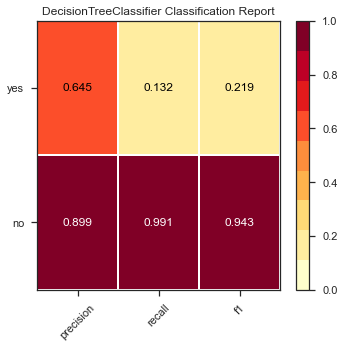

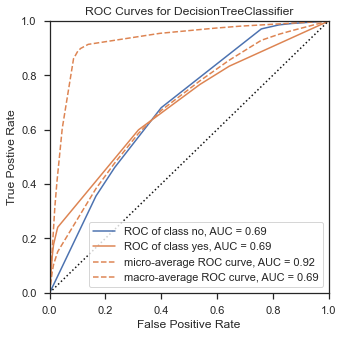

In [57]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4), random_state = 7)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4), random_state = 7)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

# Random Forest algorithm

In [58]:
rf_model = RandomForestClassifier(criterion = 'entropy', max_depth = 5, n_estimators=100, random_state=7)
rf_model = rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_score = rf_model.score(X_test , y_test)
print('Random forest model score: ', rf_score)

Random forest model score:  0.8930993807136538


In [59]:
# Compute precision, recall, F-measure and support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94     12030
         yes       0.64      0.15      0.24      1534

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.77      0.57      0.59     13564
weighted avg       0.87      0.89      0.86     13564



In [60]:
# Confusion Matrix  using crosstab
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,no,yes
Actual,,
no,11899,131
yes,1306,228


In [61]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest Classifier - entropy '], 'accuracy': rf_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.89
0,Random Forest Classifier - entropy,0.89


In [62]:
importances = pd.DataFrame(rf_model.feature_importances_, columns = ["Imp"], index = X_train.columns)
# print(importances.size, importances.shape, importances.info)
importances_filter = importances > 0.0099

importances = importances[importances_filter].dropna(axis=0, inplace=False, how='all') 
print(importances.sort_values(by=['Imp'], axis=0, ascending=False))

                    Imp
poutcome_success   0.29
person_contacted   0.12
housing_yes        0.12
poutcome_unknown   0.09
age                0.09
housing_no         0.08
balance            0.06
poutcome_failure   0.03
loan_no            0.02
loan_yes           0.02
job_blue-collar    0.01
job_retired        0.01
education_tertiary 0.01
marital_single     0.01
marital_married    0.01
poutcome_other     0.01


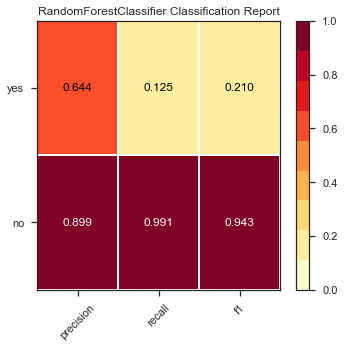

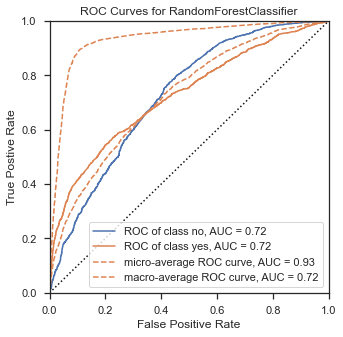

In [63]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(criterion = 'entropy', max_depth = 5, n_estimators=100), random_state = 7)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(criterion = 'entropy', max_depth = 5, n_estimators=100, random_state = 7))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

# Bagging Classifier Algorithm with Bootstrap

In [64]:
bg_model = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, random_state=7)
bg_model = bg_model.fit(X_train, y_train)

In [65]:
bg_pred = bg_model.predict(X_test)
bg_score = bg_model.score(X_test , y_test)
print('Bagging Classifier Model score: ', bg_score)


Bagging Classifier Model score:  0.886685343556473


In [66]:
# Compute precision, recall, F-measure and support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94     12030
         yes       0.64      0.15      0.24      1534

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.77      0.57      0.59     13564
weighted avg       0.87      0.89      0.86     13564



In [67]:
# Confusion Matrix  using crosstab
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,no,yes
Actual,,
no,11899,131
yes,1306,228


In [68]:
tempResultsDf = pd.DataFrame({'Method':['Bagging Classifier​ - Bootstrap  '], 'accuracy': bg_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.89
0,Random Forest Classifier - entropy,0.89
0,Bagging Classifier​ - Bootstrap,0.89


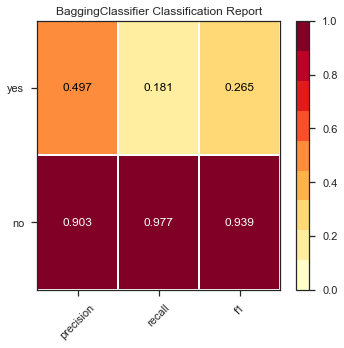

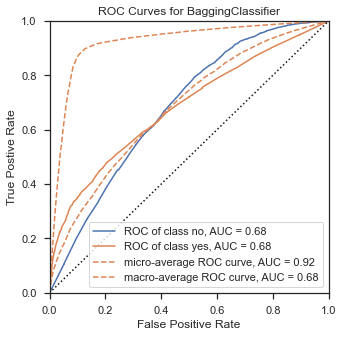

In [69]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, random_state = 7))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, random_state = 7))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

# GradientBoost Classifier (Boosting)

In [70]:
gb_model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 7) 
gb_model = gb_model.fit(X_test , y_test)

In [71]:
gb_pred = gb_model.predict(X_test)
gb_score = gb_model.score(X_test , y_test)
print('GradientBoost Classifier Model score: ', gb_score)

GradientBoost Classifier Model score:  0.8984812739604836


In [72]:
# Compute precision, recall, F-measure and support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94     12030
         yes       0.64      0.15      0.24      1534

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.77      0.57      0.59     13564
weighted avg       0.87      0.89      0.86     13564



In [73]:
# Confusion Matrix  using crosstab
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,no,yes
Actual,,
no,11899,131
yes,1306,228


In [74]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boosting Classifier '], 'accuracy': gb_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.89
0,Random Forest Classifier - entropy,0.89
0,Bagging Classifier​ - Bootstrap,0.89
0,Gradient Boosting Classifier,0.90


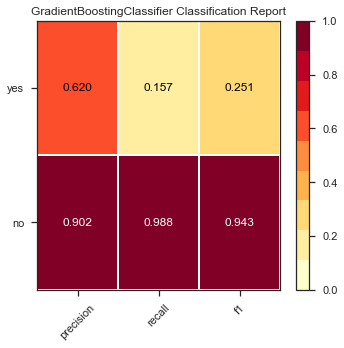

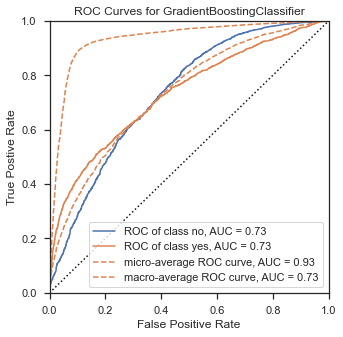

In [75]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1), random_state = 7)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1), random_state = 7)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

# Adaboost Ensemble Algorithm

In [76]:
from sklearn.ensemble import AdaBoostClassifier
ab_model = AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=7)
ab_model = ab_model.fit(X_train, y_train)

ab_pred = ab_model.predict(X_test)
ab_score = ab_model.score(X_test , y_test)
print('Adaboost Ensemble Model score: ', ab_score)


Adaboost Ensemble Model score:  0.8938366263639045


In [77]:
# Compute precision, recall, F-measure and support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94     12030
         yes       0.64      0.15      0.24      1534

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.77      0.57      0.59     13564
weighted avg       0.87      0.89      0.86     13564



In [78]:
# Confusion Matrix  using crosstab
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,no,yes
Actual,,
no,11899,131
yes,1306,228


In [79]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoostClassifier '], 'accuracy': ab_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.89
0,Random Forest Classifier - entropy,0.89
0,Bagging Classifier​ - Bootstrap,0.89
0,Gradient Boosting Classifier,0.90
0,AdaBoostClassifier,0.89


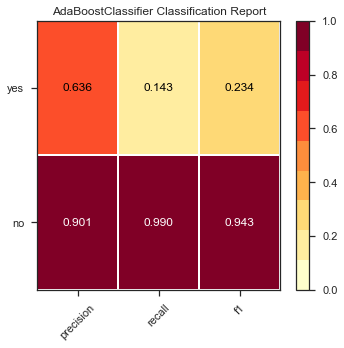

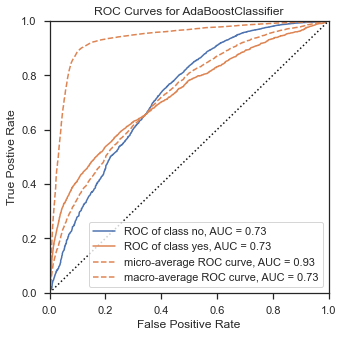

In [80]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=7))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=7))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

# Conclusion

Based on the mode score the Gradient Boosting Classifier produced r=the best results with a score of .90

When reviewing the ROC curve: AdaBoost, Gradient Boost, Bagging, Random Forest (.97) and Decision Tree (.96).  The results were very close.

When reviewing the F1 results are similar with Gradient Boost, Decision Tree, Random Forest (.95/NO and .47/Yes) and Bagging (.95/NO and .37/Yes)

When reviewing the Confusion Matrix for the total correct were the same at 12,888 and the total failures at 1,276.

Performance/speed was very fast for all the algorithms tested.

Minimum tuning was performed on the five algorithms, with hyperparameter tuning the algorithms may have differentiated themselves.

The feature values were not well distributed.  Additional data may be required/created especially the 'yes' Targets to improve the 89/11 ratio. 
    
Decision Tree pruning was performed by dropping several features and creating a new catagory feature and using hyperparameters such as limiting the maximum depth and minimum number of samples per node.